## **Digital Assignment**
### **21BDS0144 <br> Shrijeet Maiti**
#### BCSE331L <br> 24.09.24

Github Repository: [Link to GitHub](https://github.com/shrijeet-maiti-burner/EDA) <br>
Dataset used: [Catholic Dataset](https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv)

##### **Loading and Exploring the Dataset**

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/catholic.csv'
data = pd.read_csv(url)

dimensions = data.shape
print("dimensions:", dimensions)

summary = data.describe()
print("\nsummary statistics:\n", summary)

data_types = data.dtypes
print("\ndata types:\n", data_types)

dimensions: (7430, 14)

summary statistics:
           rownames            id       read12       math12       female  \
count  7430.000000  7.430000e+03  7430.000000  7430.000000  7430.000000   
mean   3715.500000  4.589838e+06    51.772402    52.133623     0.517362   
std    2145.000583  2.744467e+06     9.407761     9.459117     0.499732   
min       1.000000  1.249020e+05    29.150000    29.500000     0.000000   
25%    1858.250000  2.424049e+06    44.525000    45.020000     0.000000   
50%    3715.500000  4.592442e+06    53.080000    52.530000     1.000000   
75%    5572.750000  7.241106e+06    59.470000    59.857500     1.000000   
max    7430.000000  7.979086e+06    68.090000    71.370000     1.000000   

             asian       hispan        black     motheduc     fatheduc  \
count  7430.000000  7430.000000  7430.000000  7430.000000  7430.000000   
mean      0.051682     0.103499     0.070659    13.356864    13.674159   
std       0.221400     0.304630     0.256272     2.005982

##### **Module 2**

##### 1. Merging Data
- on = 'id' indicates that the merge should happen based on the id column.
- how = 'inner' performs an inner join, meaning only rows with matching ids in both datasets will be included.

In [2]:
# creating a sample second dataset to merge with the original one
data2 = pd.DataFrame({
    'id': [124902, 124915, 124916],
    'additional_info': ['info1', 'info2', 'info3']
})

merged_data = pd.merge(data, data2, on = 'id', how = 'inner')
merged_data

rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
0         1  124902   61.41   49.77       0      0       0      0      14.0   
1         2  124915   58.34   59.84       0      0       0      0      14.0   
2         3  124916   59.33   50.38       1      0       0      0      14.0   

   fatheduc   lfaminc  hsgrad  cathhs  parcath additional_info  
0      12.0  10.30895     1.0       0        1           info1  
1      14.0  10.30895     1.0       0        1           info2  
2      11.0  10.30895     1.0       0        1           info3

##### 2. Reshaping with Hierarchial Indexing
using set_index to create a hierarchical index, combining the id and female columns.

In [3]:
hierarchical_data = data.set_index(['id', 'female'])
hierarchical_data.head()

rownames  read12  math12  asian  hispan  black  motheduc  \
id     female                                                             
124902 0              1   61.41   49.77      0       0      0      14.0   
124915 0              2   58.34   59.84      0       0      0      14.0   
124916 1              3   59.33   50.38      0       0      0      14.0   
124932 1              4   49.59   45.03      0       0      0      12.0   
124944 1              5   57.62   54.26      0       0      0      12.0   

               fatheduc   lfaminc  hsgrad  cathhs  parcath  
id     female                                               
124902 0           12.0  10.30895     1.0       0        1  
124915 0           14.0  10.30895     1.0       0        1  
124916 1           11.0  10.30895     1.0       0        1  
124932 1           14.0  10.30895     1.0       0        1  
124944 1           12.0  10.65726     1.0       0        1

##### 3. Transformation Techniques <br> (a) Data Deduplication

In [4]:
deduplicated_data = data.drop_duplicates()

# checking for duplicate rows after removal
duplicate_rows = deduplicated_data[data.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [rownames, id, read12, math12, female, asian, hispan, black, motheduc, fatheduc, lfaminc, hsgrad, cathhs, parcath]
Index: []

##### (b) Replacing Values

In [5]:
# replacing 0 with None in the 'female' column
replaced_data = data.copy()
replaced_data['female'].replace(0, None, inplace = True)
replaced_data.head()

C:\Users\shrijeet\AppData\Local\Temp\ipykernel_20092\488314721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  replaced_data['female'].replace(0, None, inplace = True)


rownames      id  read12  math12 female  asian  hispan  black  motheduc  \
0         1  124902   61.41   49.77   None      0       0      0      14.0   
1         2  124915   58.34   59.84   None      0       0      0      14.0   
2         3  124916   59.33   50.38      1      0       0      0      14.0   
3         4  124932   49.59   45.03      1      0       0      0      12.0   
4         5  124944   57.62   54.26      1      0       0      0      12.0   

   fatheduc   lfaminc  hsgrad  cathhs  parcath  
0      12.0  10.30895     1.0       0        1  
1      14.0  10.30895     1.0       0        1  
2      11.0  10.30895     1.0       0        1  
3      14.0  10.30895     1.0       0        1  
4      12.0  10.65726     1.0       0        1

##### (c) Handling Missing Values

In [6]:
rows_with_missing_values = data[data.isnull().any(axis = 1)]
rows_with_missing_values

rownames       id  read12  math12  female  asian  hispan  black  \
26          27   184615   34.19   35.51       0      0       0      0   
30          31   700096   48.47   41.75       0      0       1      0   
32          33   701125   52.52   48.15       1      0       0      0   
34          35   701158   33.87   42.06       1      0       0      1   
38          39   701185   53.04   50.10       0      0       0      0   
...        ...      ...     ...     ...     ...    ...     ...    ...   
7340      7341  7899086   61.93   61.68       1      0       0      0   
7341      7342  7899092   64.64   63.00       0      0       0      0   
7344      7345  7906123   50.02   37.89       1      0       0      1   
7347      7348  7906156   63.29   53.05       1      0       0      1   
7364      7365  7908670   36.97   35.84       0      0       0      0   

      motheduc  fatheduc    lfaminc  hsgrad  cathhs  parcath  
26        12.0      12.0  10.021270     NaN       1        1  
30        14.0      14.0   8.294049     NaN       0        0  
32        16.0      17.0  11.042920     NaN       0        0  
34        12.0      17.0   9.433484     NaN       0        0  
38        16.0      16.0  10.308950     NaN       0        0  
...        ...       ...        ...     ...     ...      ...  
7340      14.0      17.0  10.657260     NaN       0        0  
7341      14.0      16.0  10.657260     NaN       0        0  
7344      12.0      16.0  11.042920     NaN       1        0  
7347      14.0      14.0  10.308950     NaN       1        0  
7364      14.0      14.0  11.379390     NaN       1        1  

[1460 rows x 14 columns]

In [7]:
# counting the number of missing values
missing_values = data.isnull().sum()
missing_values

rownames       0
id             0
read12         0
math12         0
female         0
asian          0
hispan         0
black          0
motheduc       0
fatheduc       0
lfaminc        0
hsgrad      1460
cathhs         0
parcath        0
dtype: int64

##### (d) Dropping Missing Values

In [8]:
dropped_data = data.dropna()

# counting missing values after dropping
missing_values = dropped_data.isnull().sum()
missing_values

rownames    0
id          0
read12      0
math12      0
female      0
asian       0
hispan      0
black       0
motheduc    0
fatheduc    0
lfaminc     0
hsgrad      0
cathhs      0
parcath     0
dtype: int64

##### (e) Filling Missing Values

In [9]:
# 1. specific value
filled_with_zero = data.fillna(0)
filled_rows = filled_with_zero.loc[rows_with_missing_values.index]
print("\nfilled missing values with 0:\n", filled_rows.head())

# 2. forward filling (propagating the previous value forward)
filled_with_ffill = data.fillna(method = 'ffill')
filled_rows = filled_with_ffill.loc[rows_with_missing_values.index]
print("\nfilled missing values using forward fill:\n", filled_rows.head())

# 3. backward filling (propagating the next value backward)
filled_with_bfill = data.fillna(method = 'bfill')
filled_rows = filled_with_bfill.loc[rows_with_missing_values.index]
print("\nfilled missing values using backward fill:\n", filled_rows.head())

# 4. mean of each column
filled_with_mean = data.fillna(data.mean())
filled_rows = filled_with_mean.loc[rows_with_missing_values.index]
print("\nfilled missing values with mean:\n", filled_rows.head())

# 5. median of each column
filled_with_median = data.fillna(data.median())
filled_rows = filled_with_median.loc[rows_with_missing_values.index]
print("\nfilled missing values with median:\n", filled_rows.head())

# 6. mode of each column
filled_with_mode = data.fillna(data.mode().iloc[0])
filled_rows = filled_with_mode.loc[rows_with_missing_values.index]
print("\nfilled missing values with mode:\n", filled_rows.head())


filled missing values with 0:
     rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
26        27  184615   34.19   35.51       0      0       0      0      12.0   
30        31  700096   48.47   41.75       0      0       1      0      14.0   
32        33  701125   52.52   48.15       1      0       0      0      16.0   
34        35  701158   33.87   42.06       1      0       0      1      12.0   
38        39  701185   53.04   50.10       0      0       0      0      16.0   

    fatheduc    lfaminc  hsgrad  cathhs  parcath  
26      12.0  10.021270     0.0       1        1  
30      14.0   8.294049     0.0       0        0  
32      17.0  11.042920     0.0       0        0  
34      17.0   9.433484     0.0       0        0  
38      16.0  10.308950     0.0       0        0  

filled missing values using forward fill:
     rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
26        27  184615   34.19   35.51       0      0      

C:\Users\shrijeet\AppData\Local\Temp\ipykernel_20092\3681448370.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_with_ffill = data.fillna(method = 'ffill')
C:\Users\shrijeet\AppData\Local\Temp\ipykernel_20092\3681448370.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_with_bfill = data.fillna(method = 'bfill')


##### 4. Discretization and Binning
involves converting continuous data into discrete bins.
##### (a) Equal-Width Binning

In [10]:
# discretizing the 'read12' column into 4 equal-width bins
data['read12_bins'] = pd.cut(data['read12'], bins = 4)

print(data[['read12', 'read12_bins']].head())

   read12      read12_bins
0   61.41  (58.355, 68.09]
1   58.34  (48.62, 58.355]
2   59.33  (58.355, 68.09]
3   49.59  (48.62, 58.355]
4   57.62  (48.62, 58.355]


##### (b) Equal-Frequency Binning (Quantile Binning)
creates bins such that each bin has the same number of data points.

In [11]:
# discretizing the 'math12' column into 4 quantile-based bins
data['math12_quantile_bins'] = pd.qcut(data['math12'], q = 4)

print(data[['math12', 'math12_quantile_bins']].head())

   math12 math12_quantile_bins
0   49.77       (45.02, 52.53]
1   59.84      (52.53, 59.858]
2   50.38       (45.02, 52.53]
3   45.03       (45.02, 52.53]
4   54.26      (52.53, 59.858]


##### (c) Custom Binning

In [12]:
# defining custom bin edges for 'lfaminc' (log family income)
bin_edges = [6, 8, 10, 12, 15]
data['lfaminc_custom_bins'] = pd.cut(data['lfaminc'], bins = bin_edges)

print(data[['lfaminc', 'lfaminc_custom_bins']].head())

    lfaminc lfaminc_custom_bins
0  10.30895            (10, 12]
1  10.30895            (10, 12]
2  10.30895            (10, 12]
3  10.30895            (10, 12]
4  10.65726            (10, 12]


##### 5. Outlier Detection and Filtering <br> (a) Z-Score for Outlier Detection
the z-score standardizes values based on the mean and standard deviation. <br> points with a z-score greater than a threshold are considered outliers.

In [13]:
from scipy import stats
import numpy as np

# z-score calculation for 'read12' column
z_scores = np.abs(stats.zscore(data['read12']))

# setting a threshold for outliers
threshold = 2
outliers_zscore = data[z_scores > threshold]

print("outliers based on z-score:\n", outliers_zscore[['read12']])

outliers based on z-score:
       read12
51     29.94
67     32.43
72     31.32
77     30.81
125    31.85
...      ...
7332   31.34
7338   31.38
7350   32.23
7385   31.39
7420   32.16

[193 rows x 1 columns]


##### (b) Interquartile Range (IQR) for Outlier Detection
detects outliers by identifying values that fall outside 1.5 times the IQR above the third quartile or below the first quartile.

In [14]:
# calculating the IQR for the 'math12' column
Q1 = data['math12'].quantile(0.25)
Q3 = data['math12'].quantile(0.75)
IQR = Q3 - Q1

# defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtering out the outliers
outliers_iqr = data[(data['math12'] < lower_bound) | (data['math12'] > upper_bound)]

print("outliers based on IQR:\n", outliers_iqr[['math12']])

outliers based on IQR:
 Empty DataFrame
Columns: [math12]
Index: []


##### (c) Visualization for Outlier Detection (Box Plot)
graphical method to detect outliers. <br> the box plot visualizes the distribution of the read12 scores. <br> points outside the "whiskers" are typically outliers.

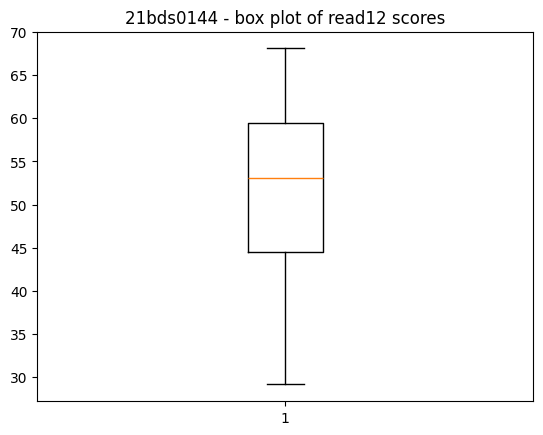

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

plt.boxplot(data['read12'].dropna())
plt.title('21bds0144 - box plot of read12 scores')
plt.show()

##### **Module 3**

##### Univariate Analysis <br> 1. Measures of Central Tendency (math12)

In [16]:
mean_math12 = data['math12'].mean()
median_math12 = data['math12'].median()
mode_math12 = data['math12'].mode()[0]

print("mean:", mean_math12)
print("median:", median_math12)
print("mode:", mode_math12)

mean: 52.133623149394346
median: 52.53
mode: 50.73


##### 2. Measures of Dispersion (math12)

In [17]:
std_math12 = data['math12'].std()
var_math12 = data['math12'].var()

print("standard deviation:", std_math12)
print("variance:", var_math12)

standard deviation: 9.45911737298719
variance: 89.47490147594807


##### 3. Quartiles and IQR (math12)

In [18]:
quantiles_math12 = data['math12'].quantile([0.25, 0.5, 0.75])
iqr_math12 = quantiles_math12[0.75] - quantiles_math12[0.25]

print("quartiles:\n", quantiles_math12)
print("\nIQR:", iqr_math12)

quartiles:
 0.25    45.0200
0.50    52.5300
0.75    59.8575
Name: math12, dtype: float64

IQR: 14.837499999999999


##### 4. Correlation (read12 and math12)

In [19]:
correlation = data['read12'].corr(data['math12'])
print("correlation between read12 and math12:", correlation)

correlation between read12 and math12: 0.7104133663371396


##### 5. Histogram (math12)

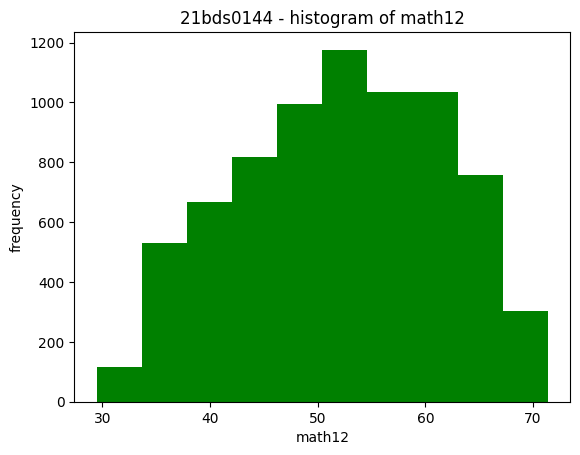

In [20]:
plt.hist(data['math12'], color = 'green', bins = 10)
plt.title("21bds0144 - histogram of math12")
plt.xlabel("math12")
plt.ylabel("frequency")
plt.show()

##### 6. Density Plot (math12)

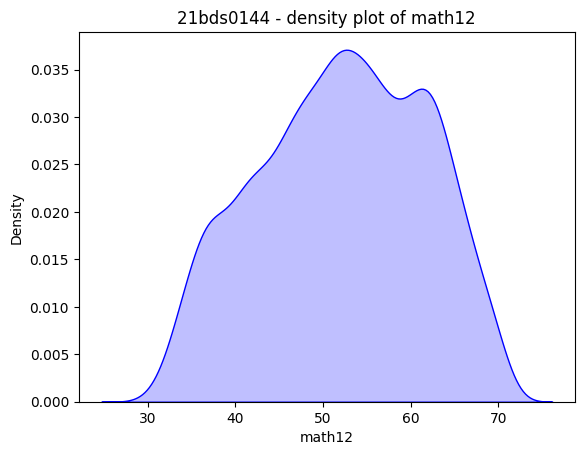

In [21]:
import seaborn as sns

sns.kdeplot(data['math12'], fill = True, color = 'blue')
plt.title("21bds0144 - density plot of math12")
plt.xlabel("math12")
plt.show()

##### 7. Box Plot (math12)

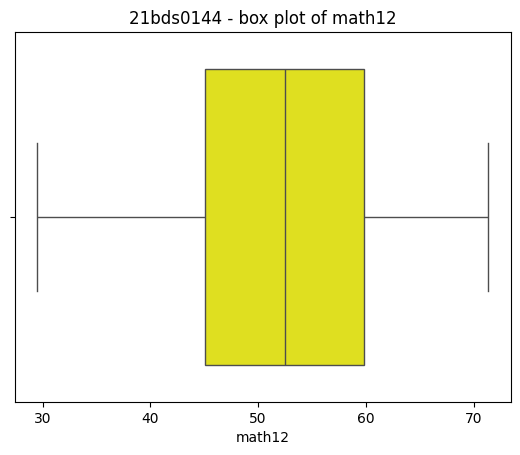

In [22]:
sns.boxplot(x = data['math12'], color = 'yellow')
plt.title("21bds0144 - box plot of math12")
plt.xlabel("math12")
plt.show()

##### 8. Bar Plot (Categorical Variable - female)

C:\Users\shrijeet\AppData\Local\Temp\ipykernel_20092\2186548687.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'female', data = data, palette = 'Set2')


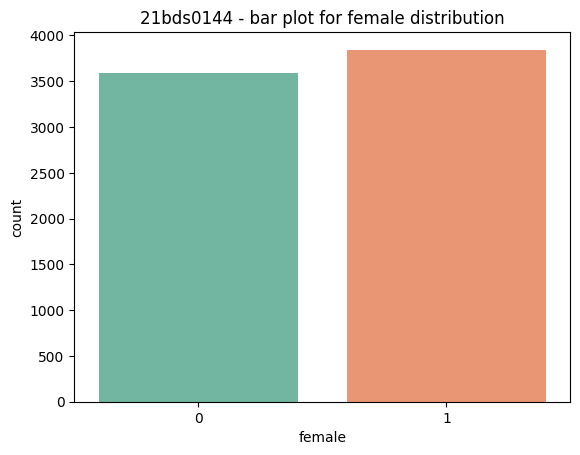

In [23]:
sns.countplot(x = 'female', data = data, palette = 'Set2')
plt.title("21bds0144 - bar plot for female distribution")
plt.xlabel("female")
plt.ylabel("count")
plt.show()

##### 9. Pie Chart (Categorical Variable - cathhs)

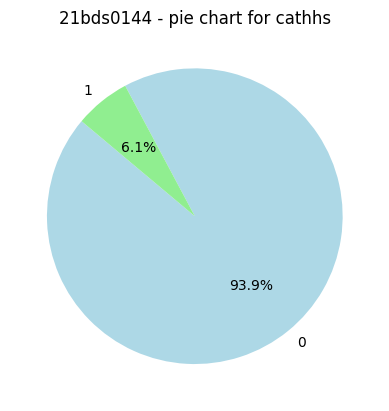

In [24]:
cathhs_counts = data['cathhs'].value_counts()
plt.pie(cathhs_counts, labels = cathhs_counts.index, autopct = '%1.1f%%',
        startangle = 140, colors = ['lightblue', 'lightgreen'])
plt.title("21bds0144 - pie chart for cathhs")
plt.show()

##### 10. Dot Plot (math12)

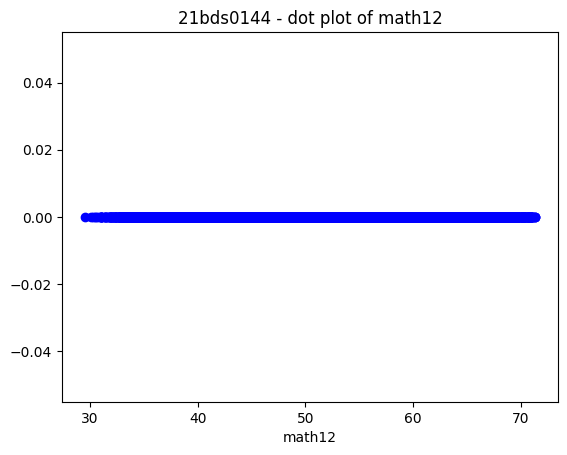

In [25]:
plt.plot(data['math12'], np.zeros_like(data['math12']), 'o', color = 'blue')
plt.title("21bds0144 - dot plot of math12")
plt.xlabel("math12")
plt.show()

##### Bivariate Analysis <br> 1. Contingency Table (Categorical Variables - female and cathhs)

In [26]:
contingency_table = pd.crosstab(data['female'], data['cathhs'])
print(contingency_table)

cathhs     0    1
female           
0       3341  245
1       3637  207


##### 2. Categorical vs Categorical Plots

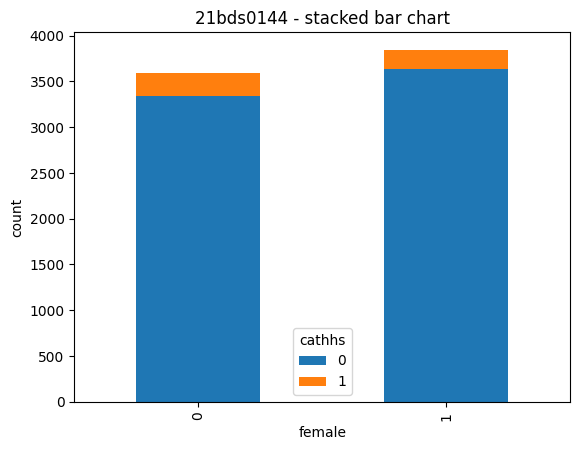

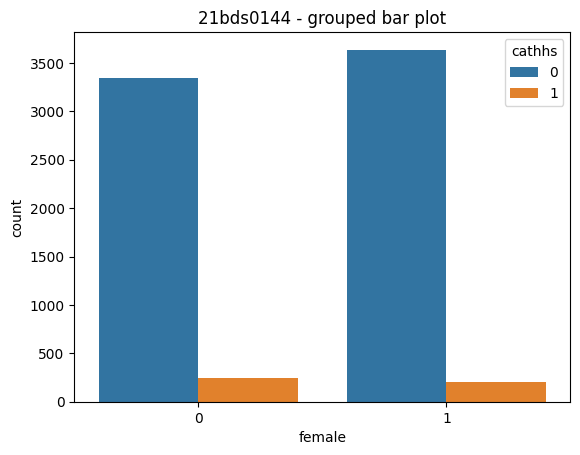

In [27]:
stacked_bar = contingency_table.plot(kind = 'bar', stacked = True)
plt.title('21bds0144 - stacked bar chart')
plt.ylabel('count')
plt.show()

sns.countplot(x = 'female', hue = 'cathhs', data = data, dodge = True)
plt.title('21bds0144 - grouped bar plot')
plt.show()

##### 3. Quantitative vs Quantitative Plots

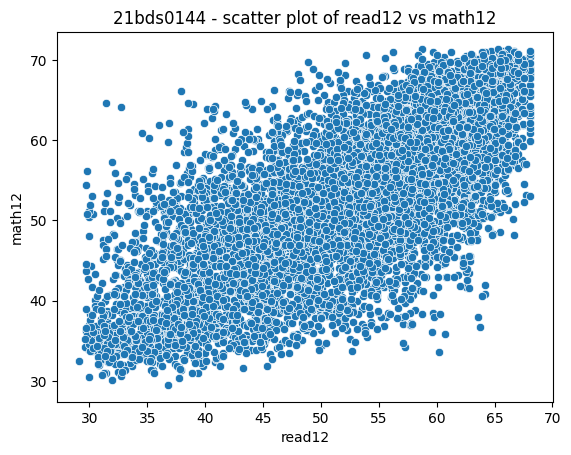

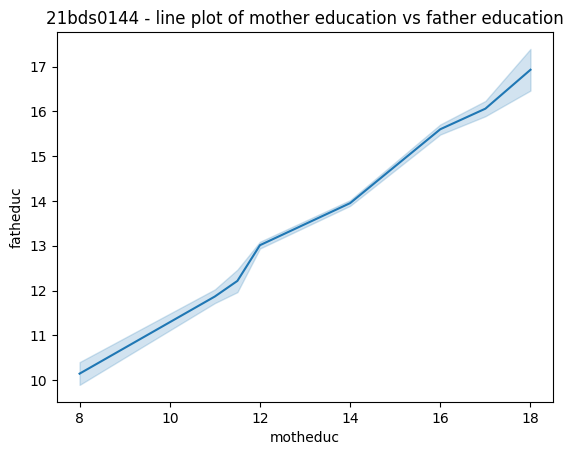

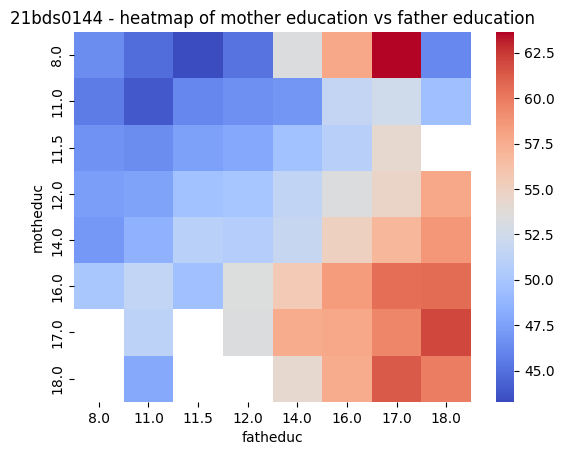

In [28]:
sns.scatterplot(x = 'read12', y = 'math12', data = data)
plt.title('21bds0144 - scatter plot of read12 vs math12')
plt.show()

sns.lineplot(x = 'motheduc', y = 'fatheduc', data = data)
plt.title('21bds0144 - line plot of mother education vs father education')
plt.show()

heatmap_data = data.pivot_table(values = 'math12', index = 'motheduc',
                                columns = 'fatheduc', aggfunc = 'mean')
sns.heatmap(heatmap_data, cmap = 'coolwarm')
plt.title('21bds0144 - heatmap of mother education vs father education')
plt.show()

##### 4. Categorical vs Quantitative Plots

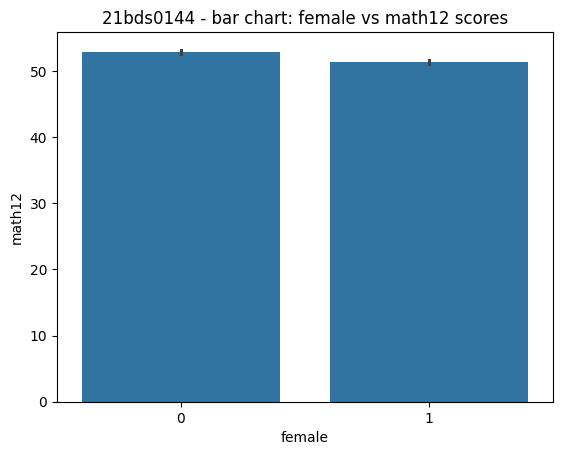

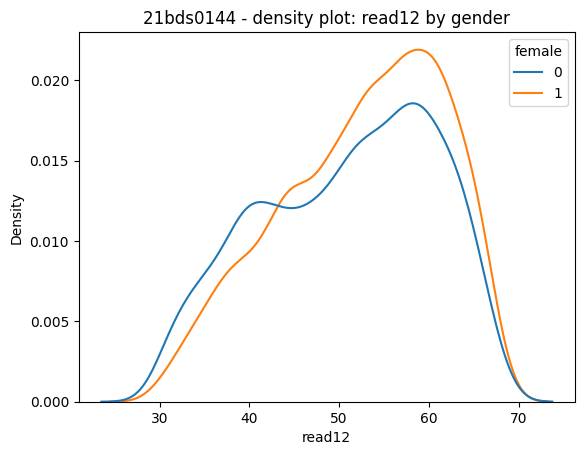

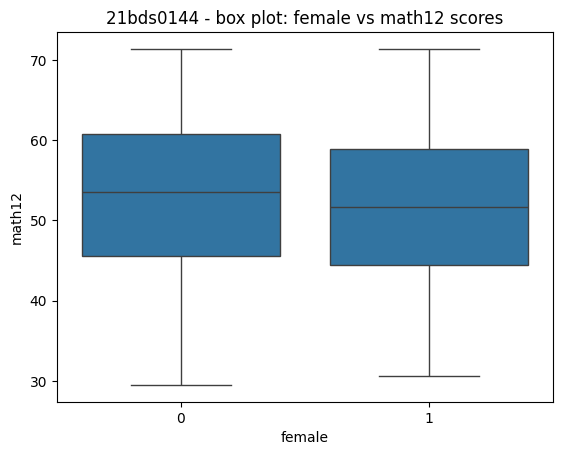

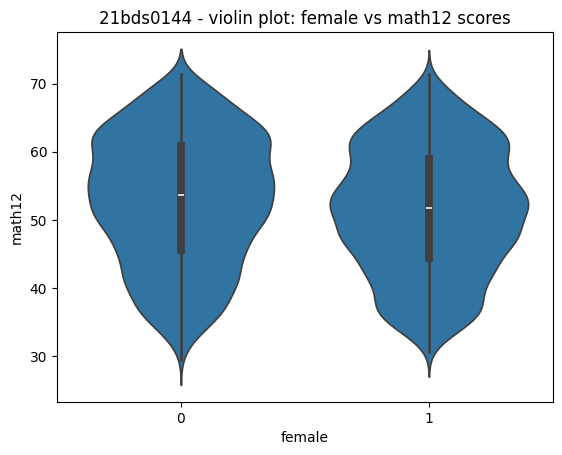

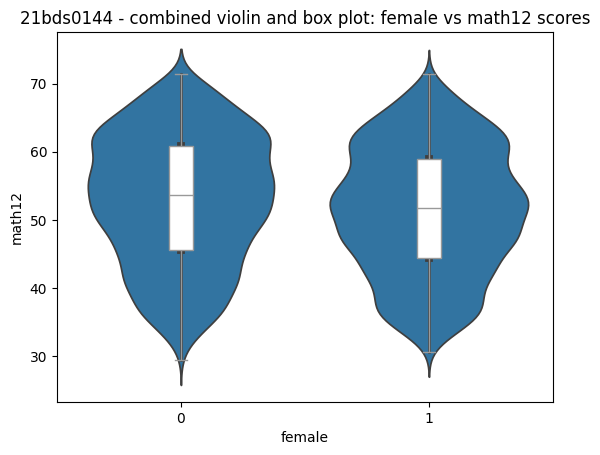

In [29]:
sns.barplot(x = 'female', y = 'math12', data = data)
plt.title('21bds0144 - bar chart: female vs math12 scores')
plt.show()

# converting 'read12' to numeric, coercing errors
data['read12'] = pd.to_numeric(data['read12'], errors='coerce')

sns.kdeplot(x = data['read12'], hue = data['female'])
plt.title('21bds0144 - density plot: read12 by gender')
plt.show()

sns.boxplot(x = 'female', y = 'math12', data = data)
plt.title('21bds0144 - box plot: female vs math12 scores')
plt.show()

sns.violinplot(x = 'female', y = 'math12', data = data)
plt.title('21bds0144 - violin plot: female vs math12 scores')
plt.show()

sns.violinplot(x = 'female', y = 'math12', data = data)
sns.boxplot(x = 'female', y = 'math12', data = data, color = 'w', width = 0.1)
plt.title('21bds0144 - combined violin and box plot: female vs math12 scores')
plt.show()

##### 5. Correlogram Matrix

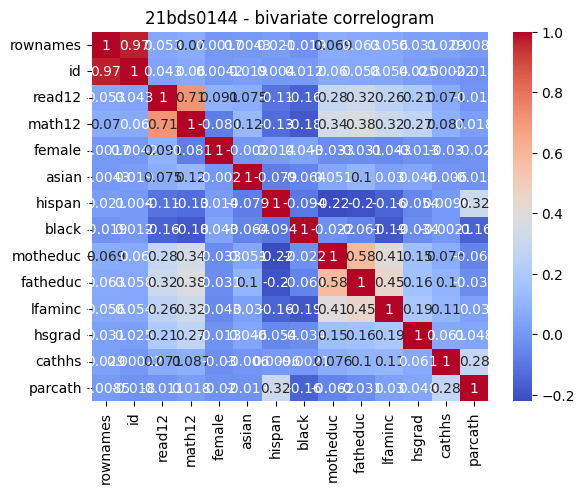

In [30]:
# only numeric data types
numeric_data = data.select_dtypes(include = [np.number])
corr = numeric_data.corr()

# using a heatmap
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("21bds0144 - bivariate correlogram")
plt.show()

##### Multivariate Analysis <br> 1. Scatter Plot (3 Variables)

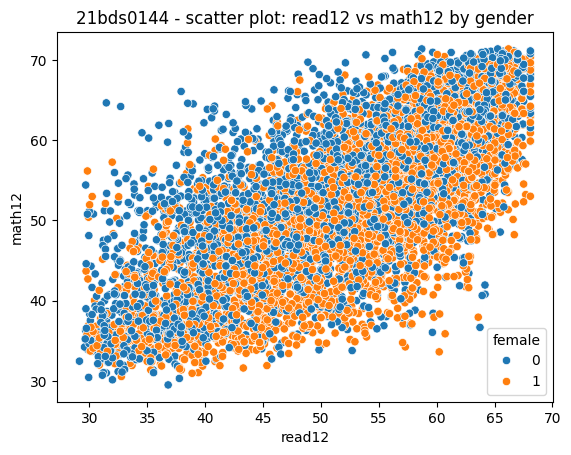

In [31]:
sns.scatterplot(x = 'read12', y = 'math12', hue = 'female', data = data)
plt.title('21bds0144 - scatter plot: read12 vs math12 by gender')
plt.show()

##### 2. Scatter Plot (4 Variables)

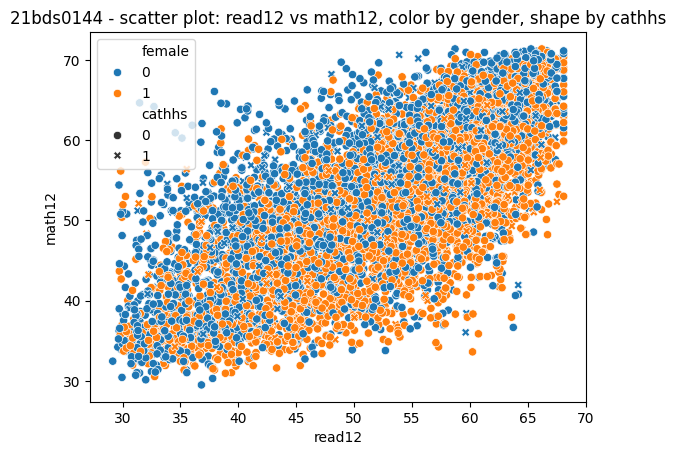

In [32]:
sns.scatterplot(x = 'read12', y = 'math12', hue = 'female', style = 'cathhs', data = data)
plt.title('21bds0144 - scatter plot: read12 vs math12, color by gender, shape by cathhs')
plt.show()

##### 3. Bubble Plot

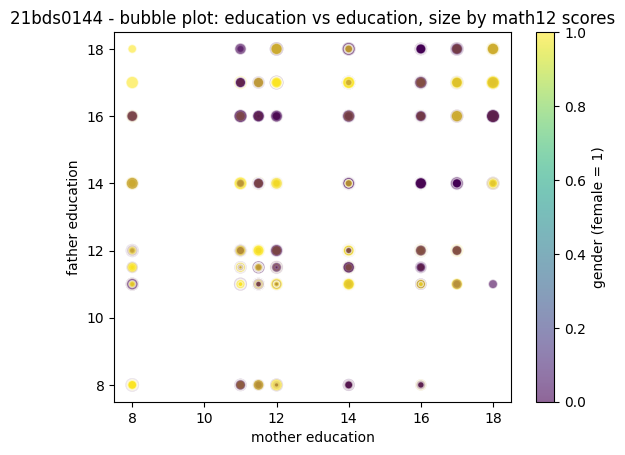

In [33]:
# scaling 'math12' scores for bubble size
size_scale = 100 * (data['math12'] - data['math12'].min()) / (data['math12'].max() - data['math12'].min())

scatter = plt.scatter('motheduc', 'fatheduc', s = size_scale,
                      c = 'female', cmap = 'viridis', alpha = 0.6, data = data, edgecolors = 'w')

# adding a color bar for the 'female' column if it's continuous or legend if categorical
plt.colorbar(scatter, label = 'gender (female = 1)')

plt.xlabel('mother education')
plt.ylabel('father education')
plt.title('21bds0144 - bubble plot: education vs education, size by math12 scores')
plt.show()

##### 4. Faceted Subgraphs

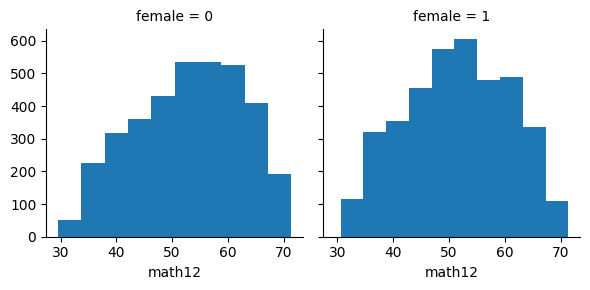

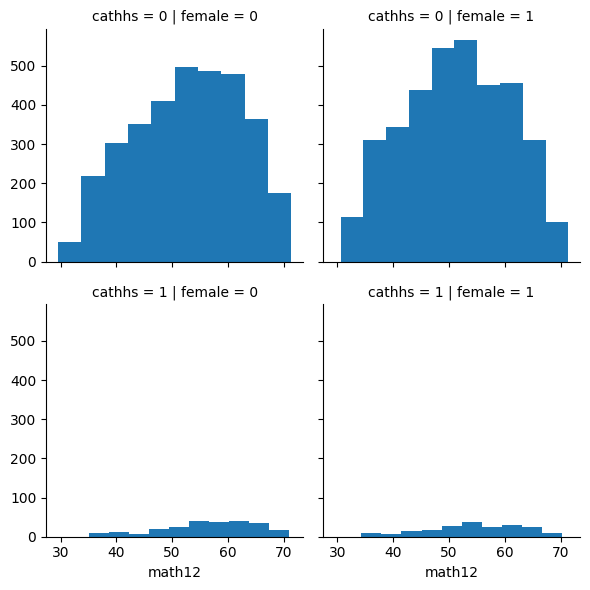

In [34]:
# (a) facet wrap
g = sns.FacetGrid(data, col = 'female', height = 3)
g.map(plt.hist, 'math12')
plt.show()

# (b) facet grid
g = sns.FacetGrid(data, col = 'female', row = 'cathhs', height = 3)
g.map(plt.hist, 'math12')
plt.show()

##### 5. Pairs Plot

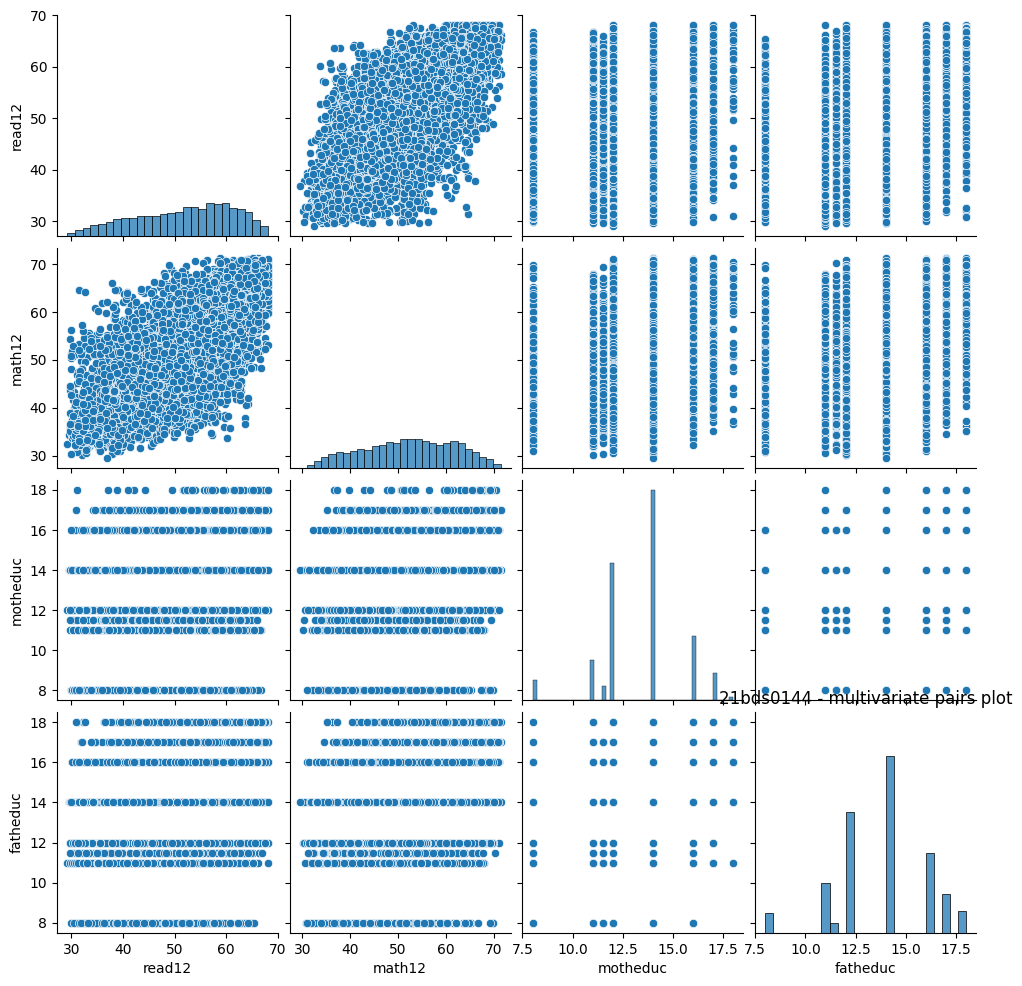

In [35]:
sns.pairplot(data[['read12', 'math12', 'motheduc', 'fatheduc']])
plt.title("21bds0144 - multivariate pairs plot")
plt.show()

##### 6. Parallel Coordinates Plot

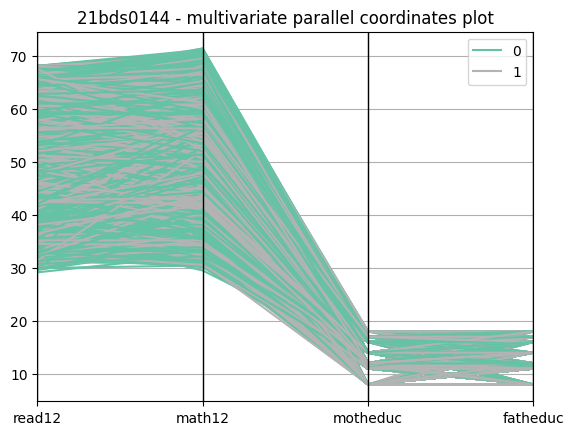

In [36]:
from pandas.plotting import parallel_coordinates

data['female'] = data['female'].astype(str)  # converting to string for plotting
parallel_coordinates(data[['read12', 'math12', 'motheduc', 'fatheduc', 'female']],
                     'female', colormap = plt.get_cmap("Set2"))
plt.title("21bds0144 - multivariate parallel coordinates plot")
plt.show()

##### **TIMESERIES:** <BR> There are no explicit date or time columns in the dataset that would typically be required for time series analysis, such as timestamps, years, months, etc. The dataset appears to focus on educational and demographic data collected at a single point in time or aggregated over an unspecified period, without any temporal sequencing evident from the column names.

##### **Module 4**

##### 1. All Measures of Central Tendency

In [37]:
# selecting a numerical column for analysis, such as 'read12' or 'math12'
column = 'read12'

mean = data[column].mean()
print("arithmetic mean:", mean)

# using 'fatheduc' as weights
weighted_mean = np.average(data[column], weights = data['fatheduc'])
print("\nweighted arithmetic mean:", weighted_mean)

quadratic_mean = np.mean(data[column]**2)
print("\nquadratic mean:", quadratic_mean)

harmonic_mean = stats.hmean(data[column].dropna())
print("\nharmonic mean:", harmonic_mean)

def weighted_harmonic_mean(x, w):
    return sum(w) / sum(w / x)

weighted_harmonic_mean_value = weighted_harmonic_mean(data[column], data['fatheduc'])
print("\nweighted harmonic mean:", weighted_harmonic_mean_value)

geometric_mean = stats.gmean(data[column].dropna())
print("\ngeometric mean:", geometric_mean)

def weighted_geometric_mean(x, w):
    return np.exp(np.sum(w * np.log(x)) / np.sum(w))

weighted_geometric_mean_value = weighted_geometric_mean(data[column].dropna(), data['fatheduc'])
print("\nweighted geometric mean:", weighted_geometric_mean_value)

alpha = 4
alpha_mean = np.mean(data[column] ** alpha) ** (1 / alpha)
print("\nalpha mean with alpha = 4:", alpha_mean)

weighted_alpha_mean = (np.sum(data['fatheduc'] * (data[column] ** alpha)) / np.sum(data['fatheduc'])) ** (1 / alpha)
print("\nweighted_alpha_mean:", weighted_alpha_mean)

arithmetic mean: 51.77240242261103

weighted arithmetic mean: 52.26696886780381

quadratic mean: 2768.8757074697173

harmonic mean: 49.864095731152474

weighted harmonic mean: 50.37143798038844

geometric mean: 50.85107645208374

weighted geometric mean: 51.355142021887154

alpha mean with alpha = 4: 54.0922978770956

weighted_alpha_mean: 54.53853726317879


##### 2. All Measures of Median and Quantiles

In [38]:
# 50th percentile (mid-value)
median = data[column].median()
print("medain:", median)

# 25th, 50th and 75th percentiles
quartiles = data[column].quantile([0.25, 0.5, 0.75])
print("\nquartiles:\n", quartiles)

# 10th to 90th percentiles in steps of 10%
deciles = data[column].quantile(np.arange(0.1, 1.0, 0.1))
print("\ndeciles:\n", deciles)

# 1st to 99th
percentiles = data[column].quantile(np.arange(0.01, 1.0, 0.01))
print("\npercentiles:\n", percentiles)

# general k-quantiles (e.g., incrementing by 20%)
quintiles = data[column].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
print("\nquintiles:\n", quintiles)

medain: 53.08

quartiles:
 0.25    44.525
0.50    53.080
0.75    59.470
Name: read12, dtype: float64

deciles:
 0.1    37.999
0.2    42.540
0.3    46.474
0.4    50.120
0.5    53.080
0.6    55.774
0.7    58.220
0.8    60.620
0.9    63.450
Name: read12, dtype: float64

percentiles:
 0.01    31.2358
0.02    32.3758
0.03    33.3387
0.04    34.1900
0.05    34.9500
         ...   
0.95    65.0800
0.96    65.5800
0.97    65.9513
0.98    66.5342
0.99    67.3600
Name: read12, Length: 99, dtype: float64

quintiles:
 0.0    29.150
0.2    42.540
0.4    50.120
0.6    55.774
0.8    60.620
1.0    68.090
Name: read12, dtype: float64


##### 3. All Measures of Dispersion

In [39]:
range_value = data[column].max() - data[column].min()
print("range:", range_value)

iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
print("\nIQR:", iqr)

# 90th percentile - 10th percentile
interdecile_range = data[column].quantile(0.9) - data[column].quantile(0.1)
print("\ninterdecile range:", interdecile_range)

mean_deviation_from_mean = np.mean(np.abs(data[column] - data[column].mean()))
print("\nmean deviation from mean:", mean_deviation_from_mean)

mean_deviation_from_median = np.mean(np.abs(data[column] - data[column].median()))
print("\nmean deviation from median:", mean_deviation_from_median)

std_dev = data[column].std()
print("\nstandard deviation:", std_dev)

variance = data[column].var()
print("\nvariance:", variance)

skewness = data[column].skew()
print("\nskewness:", skewness)

kurtosis = data[column].kurtosis()
print("\nkurtosis:", kurtosis)

range: 38.940000000000005

IQR: 14.944999999999993

interdecile range: 25.451

mean deviation from mean: 7.933235250856356

mean deviation from median: 7.871008075370121

standard deviation: 9.40776098946706

variance: 88.50596683493826

skewness: -0.3669503405376482

kurtosis: -0.8346871980187185


##### 4. Frequency Distributions

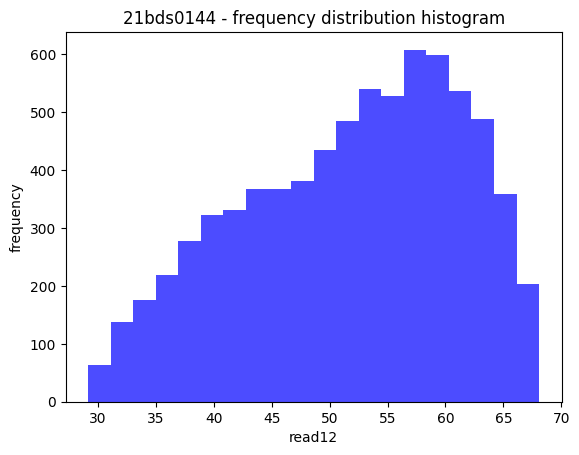

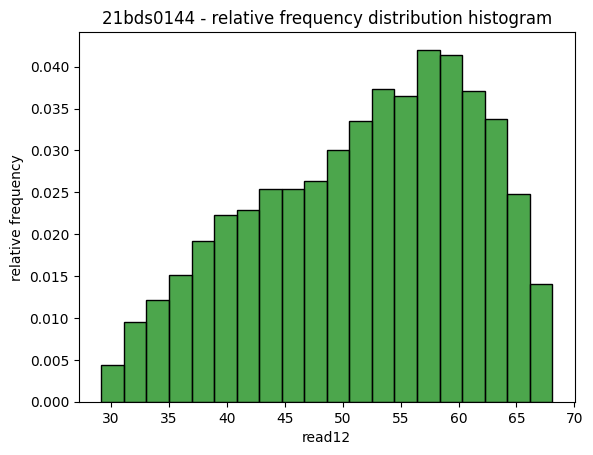

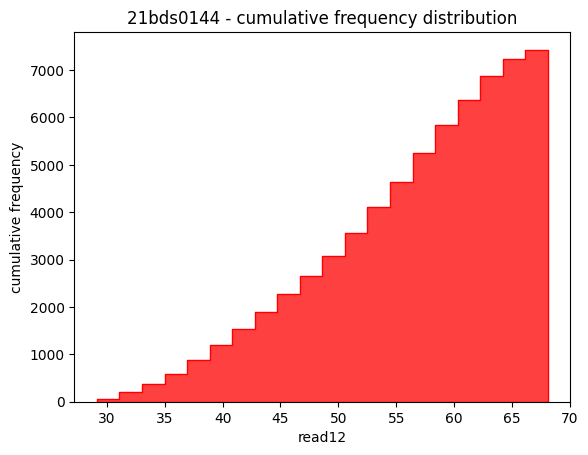

In [40]:
# (a)
plt.hist(data[column], bins = 20, color = 'blue', alpha = 0.7)
plt.title('21bds0144 - frequency distribution histogram')
plt.xlabel(column)
plt.ylabel('frequency')
plt.show()

# (b)
sns.histplot(data[column], stat = 'density', bins = 20, color = 'green', alpha = 0.7)
plt.title('21bds0144 - relative frequency distribution histogram')
plt.xlabel(column)
plt.ylabel('relative frequency')
plt.show()

# (c)
sns.histplot(data[column], cumulative = True, bins = 20, color = 'red', element = 'step')
plt.title('21bds0144 - cumulative frequency distribution')
plt.xlabel(column)
plt.ylabel('cumulative frequency')
plt.show()

##### 5. Plots Using Categorical Variables

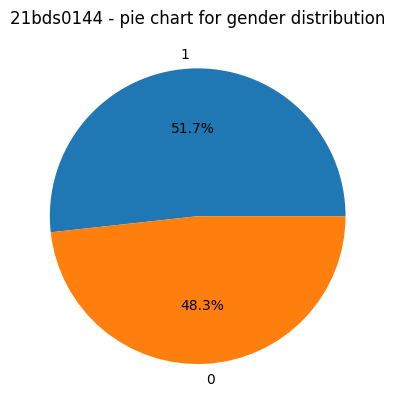

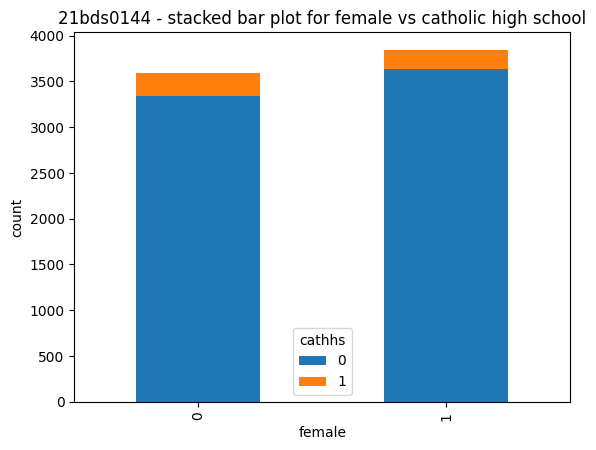

In [41]:
# (a)
data['female'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('21bds0144 - pie chart for gender distribution')
plt.ylabel('')
plt.show()

# (b)
pd.crosstab(data['female'], data['cathhs']).plot(kind = 'bar', stacked = True)
plt.title('21bds0144 - stacked bar plot for female vs catholic high school')
plt.xlabel('female')
plt.ylabel('count')
plt.show()

##### 6. Contingency Tables <br> (a) Two-Way

In [42]:
# categorical-categorical
contingency_categorical = pd.crosstab(data['female'], data['cathhs'])
print("contingency table between 'female' and 'cathhs':\n", contingency_categorical)

# categorical-numerical
contingency_numerical = data.groupby('female')['read12'].mean()
print("\ncontingency table for 'female' and mean of 'read12' scores:\n", contingency_numerical)

# correlation between numerical variables
correlation = data['read12'].corr(data['math12'])
print(f"\ncorrelation between read12 and math12: {correlation}")

contingency table between 'female' and 'cathhs':
 cathhs     0    1
female           
0       3341  245
1       3637  207

contingency table for 'female' and mean of 'read12' scores:
 female
0    50.886997
1    52.598382
Name: read12, dtype: float64

correlation between read12 and math12: 0.7104133663371396


##### (b) Three-Way

In [43]:
contingency_3way = pd.crosstab([data['female'], data['cathhs']], data['parcath'])
print("contingency table (female, cathhs, and parcath):\n", contingency_3way)

contingency table (female, cathhs, and parcath):
 parcath           0     1
female cathhs            
0      0       2286  1055
       1         25   220
1      0       2517  1120
       1         32   175


##### (c) Row and Column Profiles (Relative Distribution)
computed by dividing by the row sums and column sums respectively.

In [44]:
# relative distribution across the rows
row_profile = contingency_categorical.div(contingency_categorical.sum(axis = 1), axis = 0)
print("row profile (female vs cathhs):\n", row_profile)

# relative distribution across the columns
column_profile = contingency_categorical.div(contingency_categorical.sum(axis = 0), axis = 1)
print("\ncolumn profile (female vs cathhs):\n", column_profile)

row profile (female vs cathhs):
 cathhs         0         1
female                    
0       0.931679  0.068321
1       0.946150  0.053850

column profile (female vs cathhs):
 cathhs        0         1
female                   
0       0.47879  0.542035
1       0.52121  0.457965


##### (d) Relative Frequency
calculated by dividing the 2-way contingency table by the total sum of all entries.

In [45]:
relative_frequency = contingency_categorical / contingency_categorical.sum().sum()
print("relative frequency table (female vs cathhs):\n", relative_frequency)

relative frequency table (female vs cathhs):
 cathhs         0         1
female                    
0       0.449664  0.032974
1       0.489502  0.027860


##### (e) Chi-Square Test for Independence
to check if there is a significant association between the two categorical variables.

In [46]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_categorical)
print(f"chi-square test result:\nchi2 value: {chi2}\np-value: {p}\ndegrees of freedom: {dof}")
print("\nexpected frequencies:\n", pd.DataFrame(expected, columns = contingency_categorical.columns,
                                                index = contingency_categorical.index))

# interpretation based on p-value
alpha = 0.05
if p < alpha:
    print("\nrejecting the null hypothesis: there is a significant association between female and cathhs.")
else:
    print("\nfailed to reject the null hypothesis: no significant association between female and cathhs.")


chi-square test result:
chi2 value: 6.549180698670794
p-value: 0.010493246720116804
degrees of freedom: 1

expected frequencies:
 cathhs            0           1
female                         
0       3367.847645  218.152355
1       3610.152355  233.847645

rejecting the null hypothesis: there is a significant association between female and cathhs.


##### 7. 3D Scatter Plot

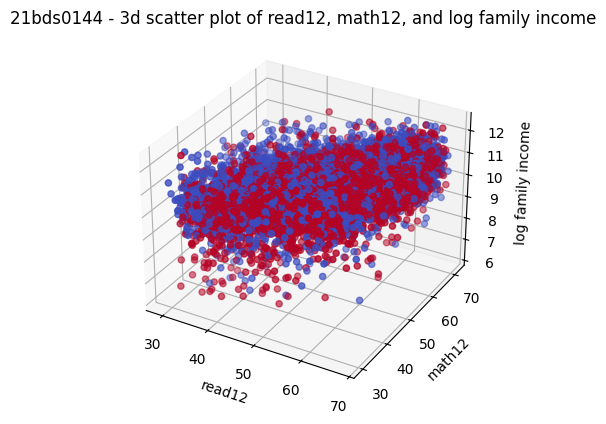

In [47]:
data['female'] = data['female'].astype('category')

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data['read12'], data['math12'], data['lfaminc'],
           c = data['female'].cat.codes, cmap = 'coolwarm')
ax.set_xlabel('read12')
ax.set_ylabel('math12')
ax.set_zlabel('log family income')
plt.title('21bds0144 - 3d scatter plot of read12, math12, and log family income')
plt.show()

##### 8. 3D Bar Plot

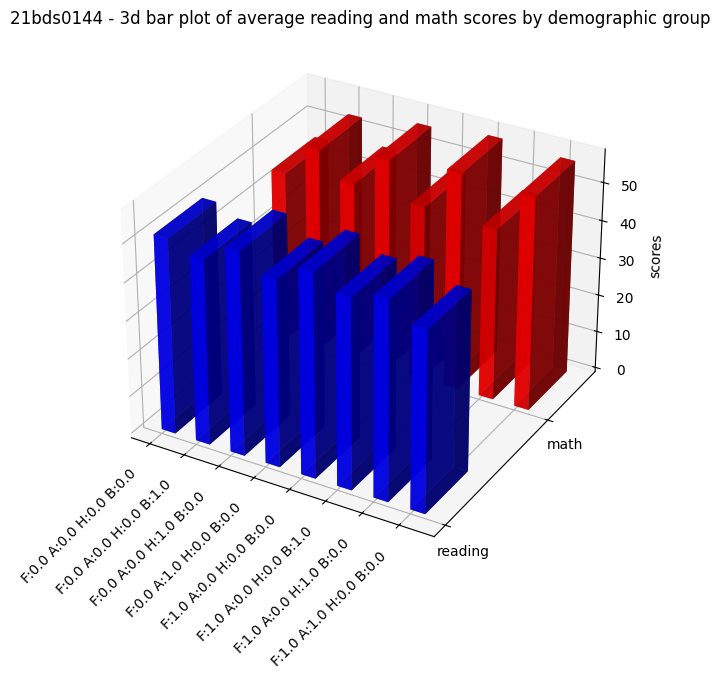

In [48]:
data = pd.read_csv(url)

# calculating the mean scores by demographic groups
grouped_data = data.groupby(['female', 'asian', 'hispan', 'black'])[['read12', 'math12']].mean().reset_index()

# generating labels for each demographic group
grouped_data['label'] = grouped_data.apply(
    lambda row: f"F:{row['female']} A:{row['asian']} H:{row['hispan']} B:{row['black']}", axis = 1)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

num_groups = len(grouped_data)
xpos = np.arange(num_groups)  # x positions for each demographic group
ypos = np.array([0, 1] * num_groups)  # y positions for reading and math scores
xpos = np.repeat(xpos, 2)  # repeat xpos to match reading and math

# heights of the bars
zpos = np.zeros_like(xpos)

# bar heights for reading and math scores
read_scores = grouped_data['read12'].tolist()
math_scores = grouped_data['math12'].tolist()
bar_heights = np.array(read_scores + math_scores)

dx = np.ones_like(xpos) * 0.4  # width of bars in x-direction
dy = np.ones_like(ypos) * 0.4  # width of bars in y-direction
dz = bar_heights  # height of bars

colors = ['b' if i % 2 == 0 else 'r' for i in range(len(bar_heights))]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors, alpha = 0.8)

ax.set_xticks(np.arange(num_groups))
ax.set_xticklabels(grouped_data['label'], rotation = 45, ha = 'right')
ax.set_yticks([0, 1])
ax.set_yticklabels(['reading', 'math'])
ax.set_zlabel('scores')

plt.title('21bds0144 - 3d bar plot of average reading and math scores by demographic group')

plt.show()

##### 9. Sunray (Radar) Plot

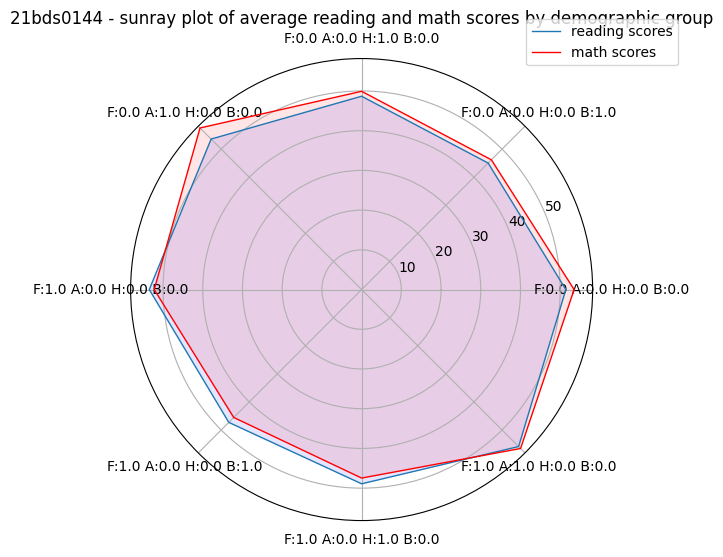

In [49]:
# number of variables
num_vars = len(grouped_data)

# computing angles for each category on the plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint = False).tolist()

# completing the loop by appending the first angle at the end
angles += angles[:1]

# preparing values for the plot
read_scores = grouped_data['read12'].tolist()
math_scores = grouped_data['math12'].tolist()

# closing the loop by adding the first value to the end of the lists
read_scores += read_scores[:1]
math_scores += math_scores[:1]

fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))

# plotting reading scores
ax.plot(angles, read_scores, linewidth = 1, linestyle = 'solid', label = 'reading scores')
ax.fill(angles, read_scores, 'b', alpha = 0.1)

# plotting math scores
ax.plot(angles, math_scores, linewidth = 1, linestyle = 'solid', label = 'math scores', color = 'r')
ax.fill(angles, math_scores, 'r', alpha = 0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(grouped_data['label'])

plt.title('21bds0144 - sunray plot of average reading and math scores by demographic group')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1.1))

plt.show()

##### **Module 5**

##### 1. Elbow method to find optimal number of clusters

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

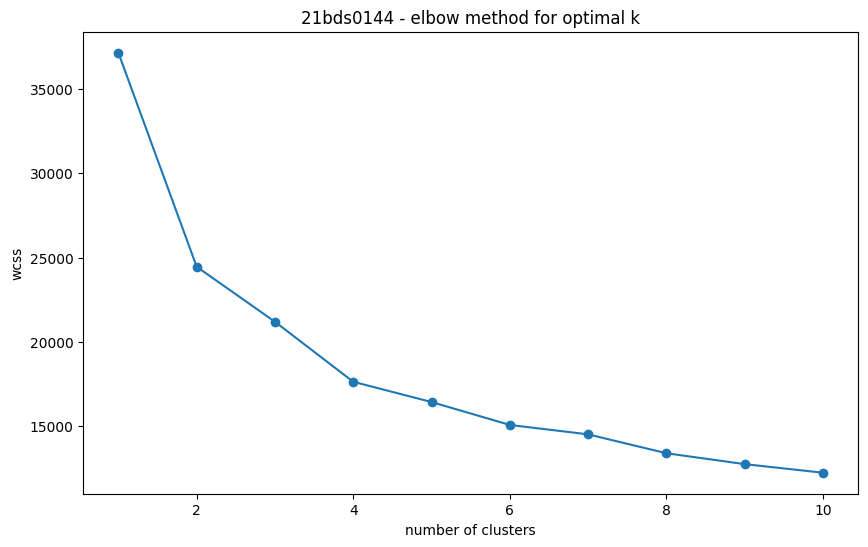

In [51]:
df = pd.read_csv(url)
data = df[['read12', 'math12', 'motheduc', 'fatheduc', 'lfaminc']]

# selecting relevant numerical columns for clustering
data = df[['read12', 'math12', 'motheduc', 'fatheduc', 'lfaminc']]

# standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('21bds0144 - elbow method for optimal k')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

##### 2. Training the K-means model with optimal number of clusters (assuming 3 from elbow plot)

In [52]:
optimal_clusters = 4
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 42)
kmeans.fit(scaled_data)
data['KMeans_Cluster'] = kmeans.labels_

C:\Users\shrijeet\AppData\Local\Temp\ipykernel_20092\4179995391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['KMeans_Cluster'] = kmeans.labels_


##### 3. Visualizing KMeans clusters (using first two principal components for visualization simplicity)


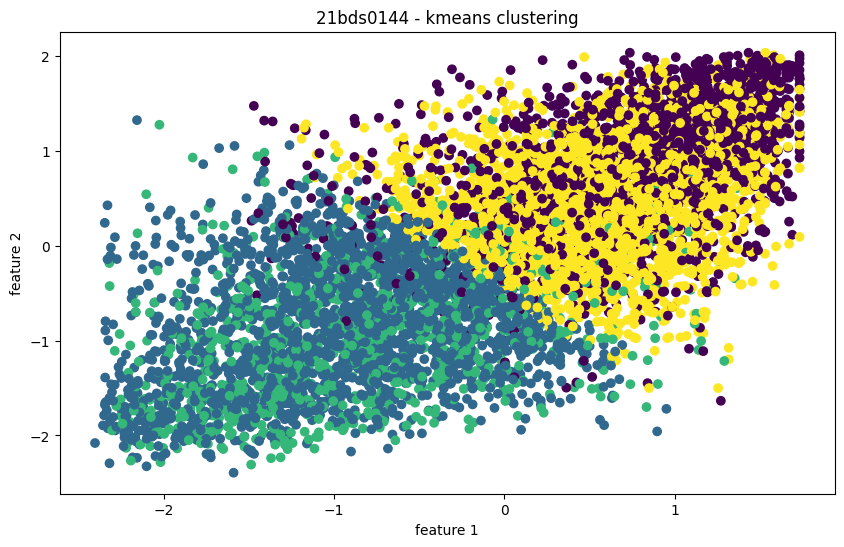

In [53]:
plt.figure(figsize = (10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c = kmeans.labels_, cmap = 'viridis', marker = 'o')
plt.title('21bds0144 - kmeans clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

##### 4. Hierarchical Clustering with different distance metrics and linkage methods

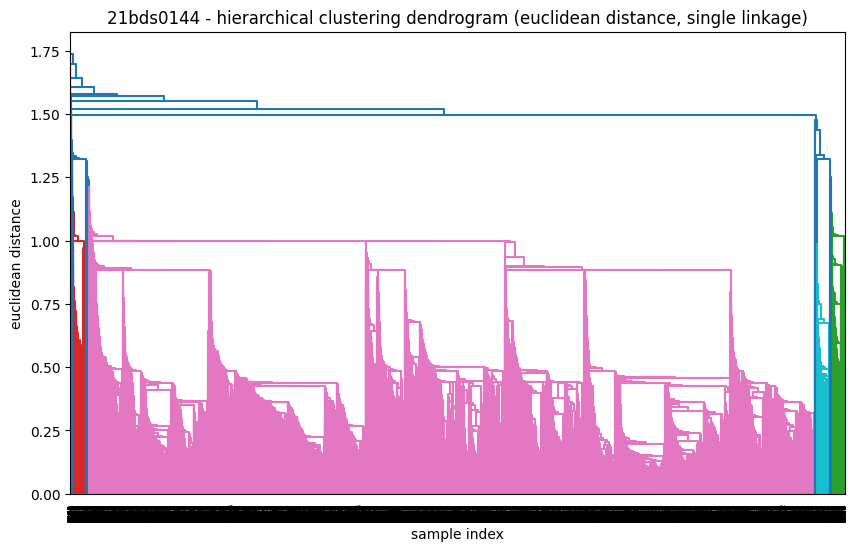

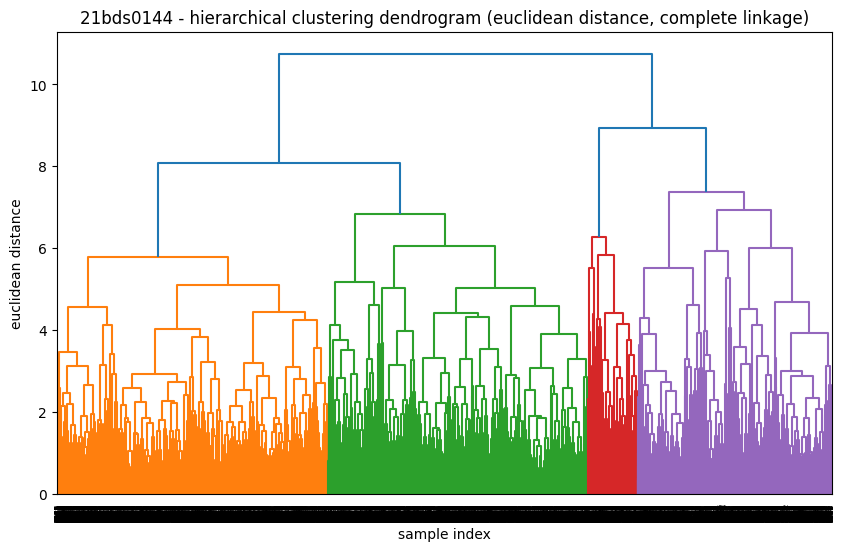

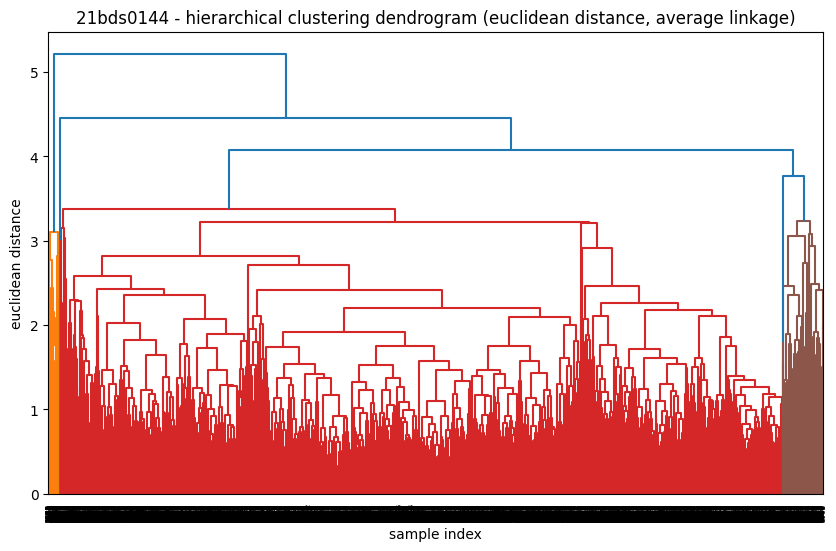

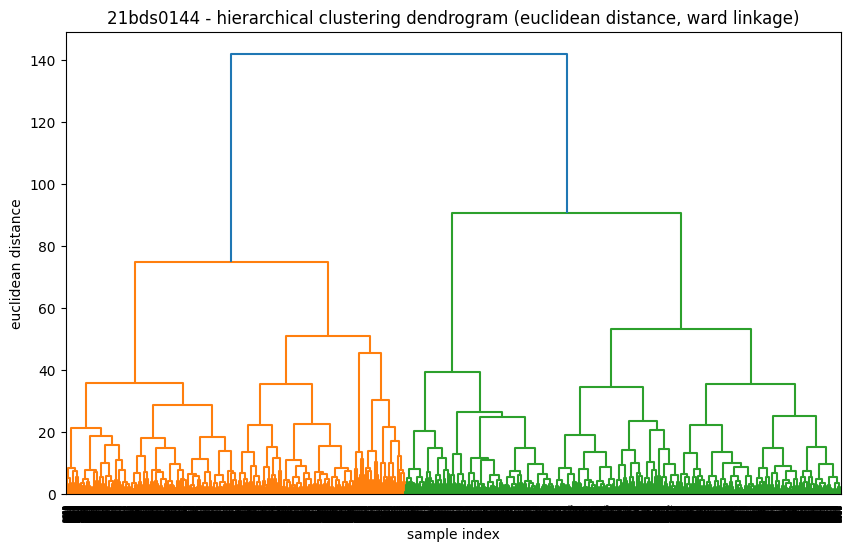

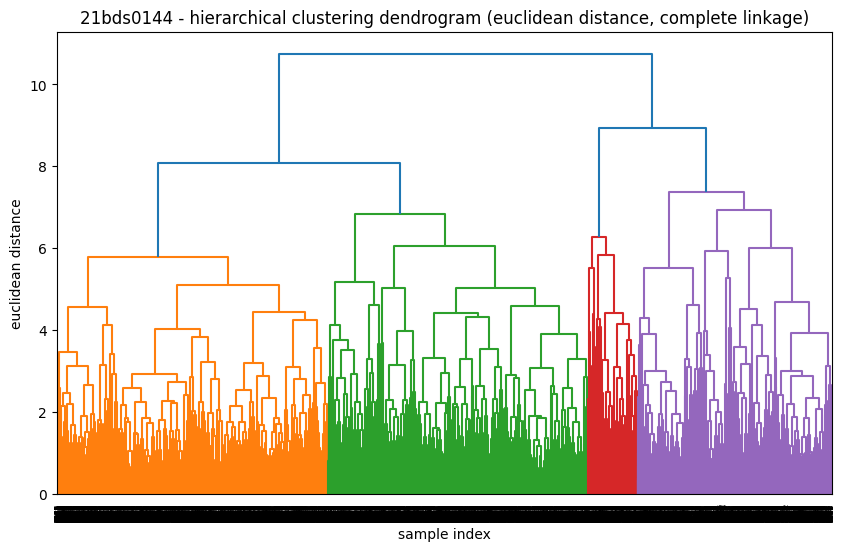

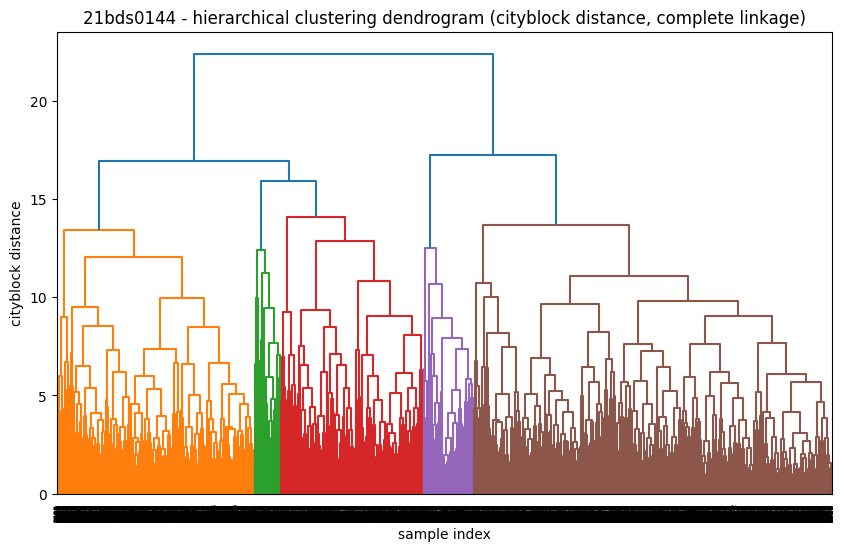

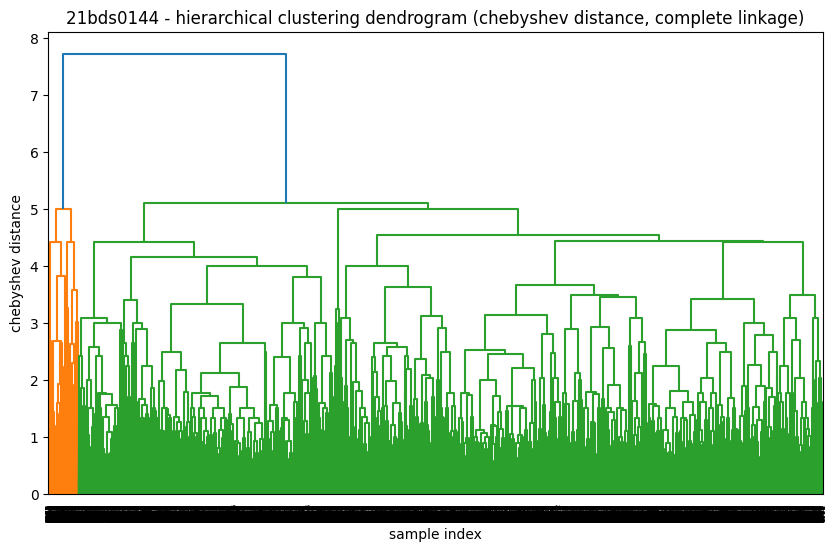

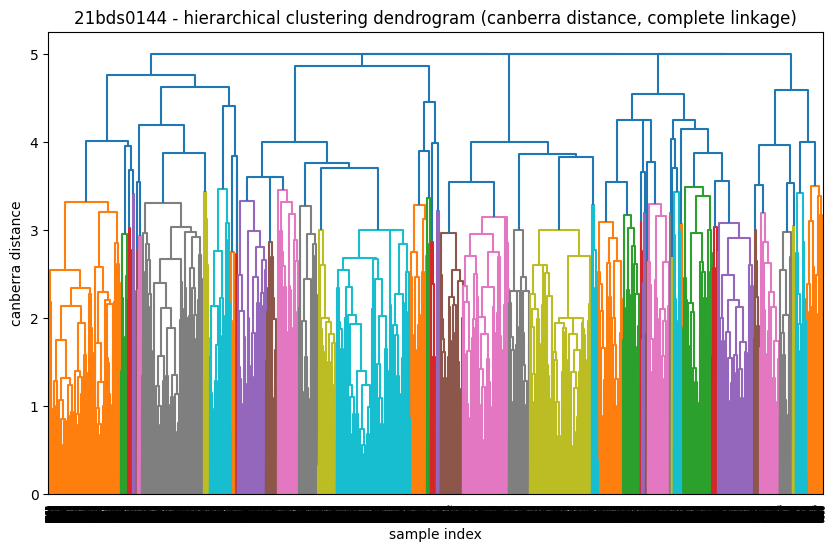

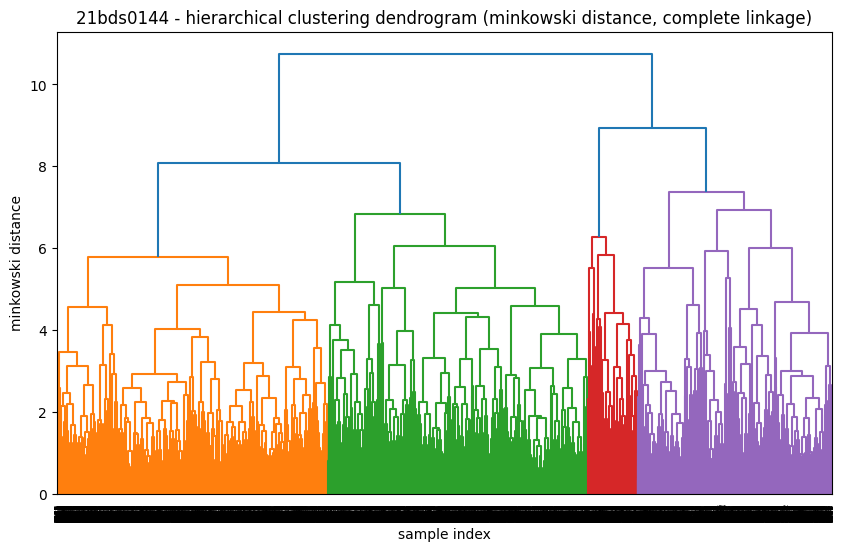

In [54]:
distance_metrics = ['euclidean', 'cityblock', 'chebyshev', 'canberra', 'minkowski'] # cityblock is manhattan in scipy
linkage_methods = ['single', 'complete', 'average', 'ward']

# euclidean distance with all linkage methods
for method in linkage_methods:
    plt.figure(figsize = (10, 6))
    plt.title(f'21bds0144 - hierarchical clustering dendrogram (euclidean distance, {method} linkage)')
    Z = linkage(scaled_data, method = method, metric = 'euclidean')
    dendrogram(Z)
    plt.xlabel('sample index')
    plt.ylabel('euclidean distance')
    plt.show()

# all distance metrics with complete linkage
for metric in distance_metrics:
    plt.figure(figsize = (10, 6))
    plt.title(f'21bds0144 - hierarchical clustering dendrogram ({metric} distance, complete linkage)')
    Z = linkage(scaled_data, method = 'complete', metric = metric)
    dendrogram(Z)
    plt.xlabel('sample index')
    plt.ylabel(f'{metric} distance')
    plt.show()

##### 5. Optimal number of clusters from a dendogram <br>
- Plotting a dendrogram with a threshold line to visualize potential cut points
- Extracting the optimal number of clusters by setting a height threshold and using 'fcluster'

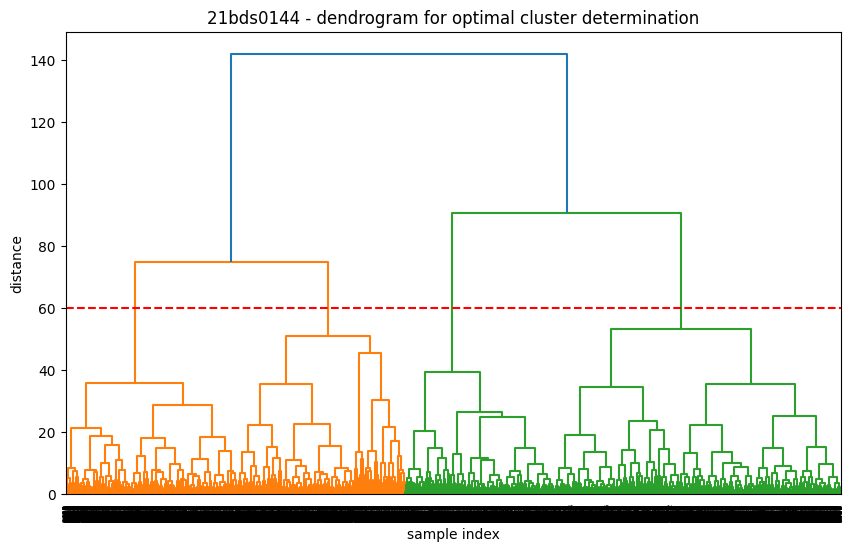

optimal number of clusters from dendrogram: 4


In [55]:
from scipy.cluster.hierarchy import fcluster

# linkage matrix
Z = linkage(scaled_data, method = 'ward', metric = 'euclidean')

# plotting the dendrogram with a threshold line
plt.figure(figsize = (10, 6))
plt.title('21bds0144 - dendrogram for optimal cluster determination')
dendrogram(Z)

plt.axhline(y = 60, color = 'r', linestyle = '--') # adjusting height as per dendrogram inspection
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

threshold = 60  # adjusting based on the dendrogram plot
clusters = fcluster(Z, threshold, criterion = 'distance')

optimal_clusters = len(set(clusters))
print("optimal number of clusters from dendrogram:", optimal_clusters)

##### **Module 6**

##### 1. Plotting correlation matrix to view the relationship between variables

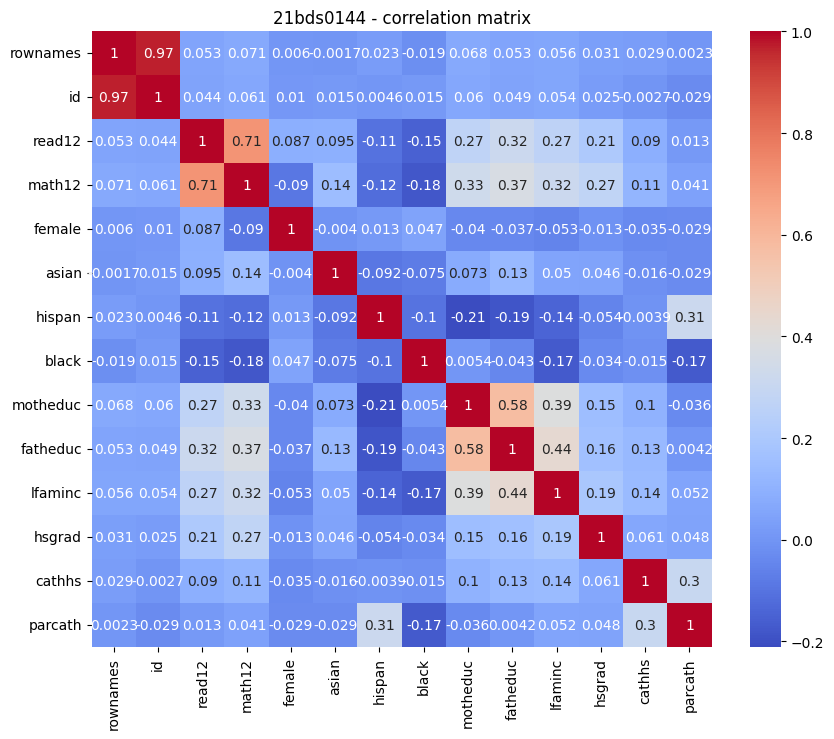

In [56]:
from sklearn.decomposition import PCA

# removing rows with missing values and selecting numeric columns
df = df.dropna()
numeric_df = df.select_dtypes(include = [np.number])

# standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

plt.figure(figsize = (10, 8))
sns.heatmap(np.corrcoef(scaled_data, rowvar = False), annot = True, cmap = "coolwarm", 
            xticklabels = numeric_df.columns, yticklabels = numeric_df.columns)
plt.title("21bds0144 - correlation matrix")
plt.show()

##### 2. Performing PCA

In [57]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# viewing the principal components and explained variance
print("principal components:\n", pca.components_)
print("explained variance (each component):\n", pca.explained_variance_ratio_)

# coordinates of individuals (data points) in the new PCA space
pca_df = pd.DataFrame(data = pca_data, columns = [f"PC{i + 1}" for i in range(pca_data.shape[1])])
pca_df['female'] = df['female'].values  # adding 'female' column for group visualization

principal components:
 [[-1.33589575e-01 -1.26751175e-01 -4.04767480e-01 -4.44835820e-01
   3.70039174e-02 -1.24805071e-01  1.64360856e-01  1.20465301e-01
  -3.94625609e-01 -4.21193828e-01 -3.75453782e-01 -2.29510136e-01
  -1.36174063e-01 -2.41441238e-02]
 [-6.92775379e-01 -6.94861472e-01  7.48449732e-02  7.44475426e-02
  -2.72157272e-02  3.88636957e-02 -7.16588797e-02 -4.09565117e-02
   5.73719421e-02  7.87859331e-02  6.28328657e-02  4.34976758e-02
   3.45852710e-02  2.20718627e-02]
 [ 1.97849760e-02 -1.66542258e-02  6.50291291e-02  8.58491206e-02
  -6.54125004e-02 -8.47084766e-02  5.06930761e-01 -3.60393751e-01
  -1.66932431e-01 -1.04098540e-01  3.35974067e-02  6.76572371e-02
   3.60071219e-01  6.44480447e-01]
 [ 5.37795138e-03 -2.19878460e-03 -4.07720972e-01 -3.26388949e-01
  -2.43615871e-01 -2.74539202e-01 -1.07105748e-01  3.40717935e-01
   3.22232123e-01  2.72827555e-01  2.09549040e-01 -1.17649255e-01
   4.43461220e-01  1.79557431e-01]
 [ 1.75353041e-02  1.87255908e-02 -2.31291841

##### 3. PCA results

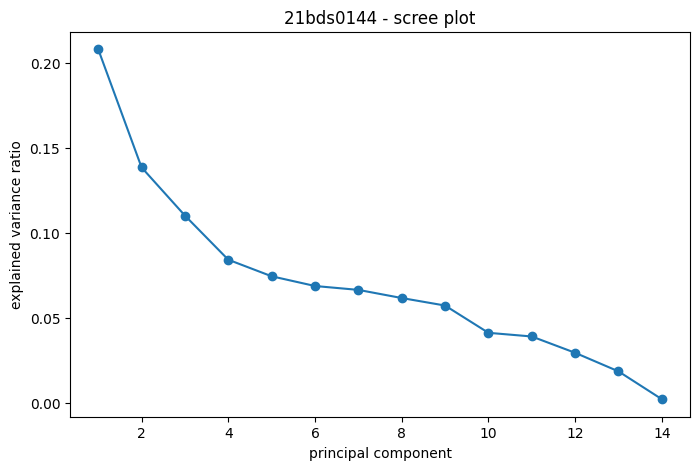

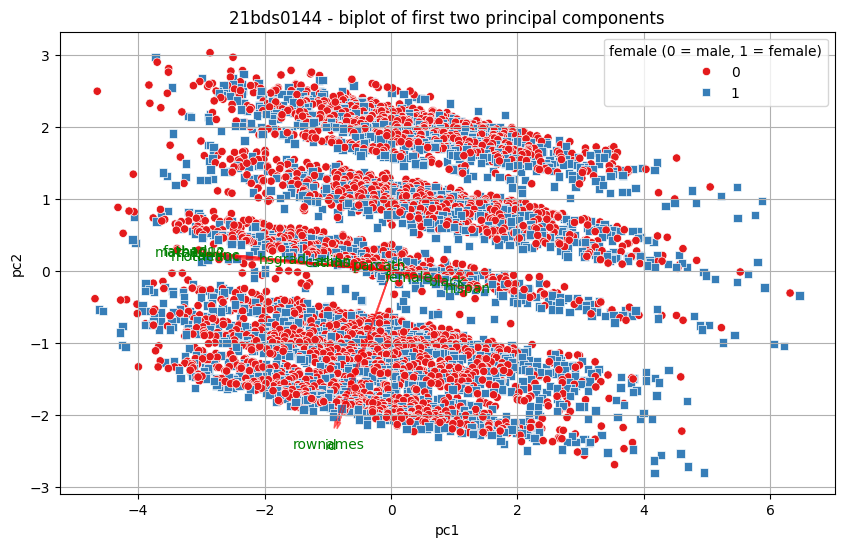

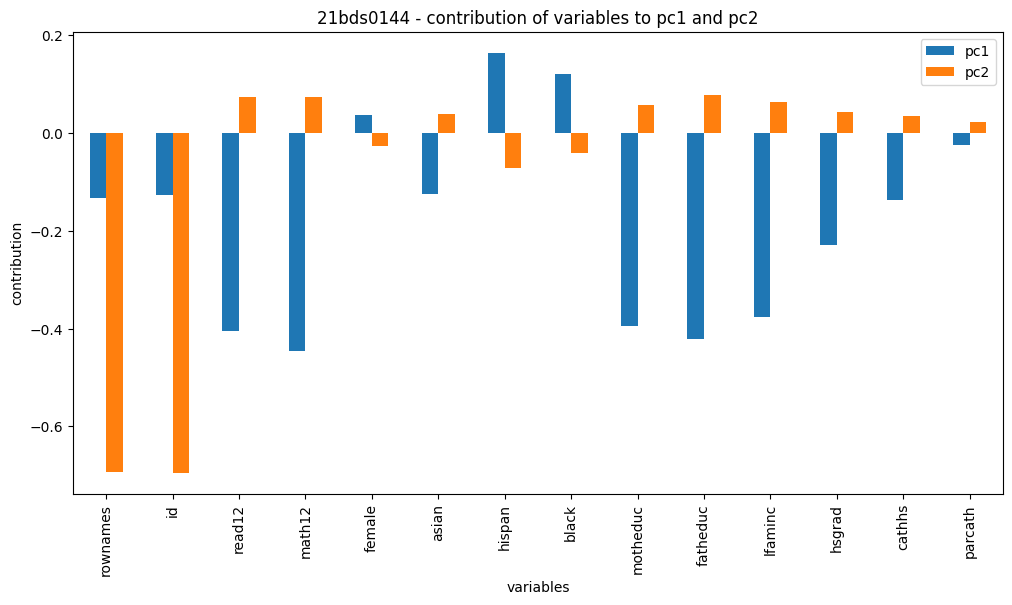

In [58]:
# scree plot
plt.figure(figsize = (8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker = 'o')
plt.title("21bds0144 - scree plot")
plt.xlabel("principal component")
plt.ylabel("explained variance ratio")
plt.show()

# plotting individuals on the first two principal components
plt.figure(figsize = (10, 6))
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = pca_df['female'], palette = "Set1", 
                style = pca_df['female'], markers = ["o", "s"])

# plotting the variable vectors
for i, variable in enumerate(numeric_df.columns):
    plt.arrow(0, 0, pca.components_[0, i] * max(pca_df['PC1']), pca.components_[1, i] * max(pca_df['PC2']),
              color='r', alpha = 0.5, head_width = 0.05, head_length = 0.1)
    plt.text(pca.components_[0, i] * max(pca_df['PC1']) * 1.15, pca.components_[1, i] * max(pca_df['PC2']) * 1.15,
             variable, color = 'g', ha = 'center', va = 'center')

plt.title("21bds0144 - biplot of first two principal components")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.legend(title = "female (0 = male, 1 = female)")
plt.grid()
plt.show()

# contribution of variables to pc1 and pc2
components = pd.DataFrame(pca.components_[:2].T, index = numeric_df.columns, columns = ['pc1', 'pc2'])
components.plot(kind = 'bar', figsize = (12, 6))
plt.title("21bds0144 - contribution of variables to pc1 and pc2")
plt.xlabel("variables")
plt.ylabel("contribution")
plt.show()

##### 4. Multidimensional Scaling <br>
MDS transformation projects the data into a 2D space, similar to PCA, but focused on preserving pairwise distances.

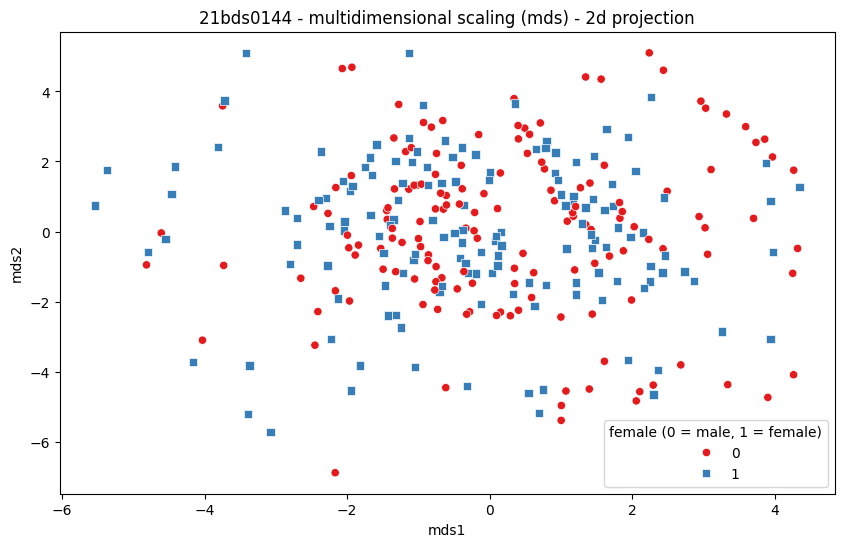

In [59]:
from sklearn.manifold import MDS

# selecting a subset of the data for MDS to reduce memory usage
subset_data = scaled_data[:300]  # first 300 rows

mds = MDS(n_components = 2, random_state = 42)
mds_data = mds.fit_transform(subset_data)

# dataframe for MDS results and adding the 'female' column for grouping
mds_df = pd.DataFrame(data = mds_data, columns = ["MDS1", "MDS2"])
mds_df['female'] = df['female'].values[:300]

plt.figure(figsize = (10, 6))
sns.scatterplot(x = mds_df['MDS1'], y = mds_df['MDS2'], hue = mds_df['female'], palette = "Set1", style = mds_df['female'], markers = ["o", "s"])
plt.title("21bds0144 - multidimensional scaling (mds) - 2d projection")
plt.xlabel("mds1")
plt.ylabel("mds2")
plt.legend(title = "female (0 = male, 1 = female)")
plt.show()

##### **Module 7**

##### 1. Performing Linear Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv(url)
df = df.dropna()

# selecting relevant columns for linear regression
# predicting `math12` score using `read12`, `motheduc`, `fatheduc`, and `lfaminc` as features

X = df[['read12', 'motheduc', 'fatheduc', 'lfaminc']]
y = df['math12']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# performing predictions
y_pred = model.predict(X_test)

##### 2. Differences between actual and predicted values

   actual values  predicted values  difference
0          62.02         49.779774   12.240226
1          57.68         46.898116   10.781884
2          51.10         52.158926   -1.058926
3          62.16         45.861840   16.298160
4          55.28         57.088787   -1.808787


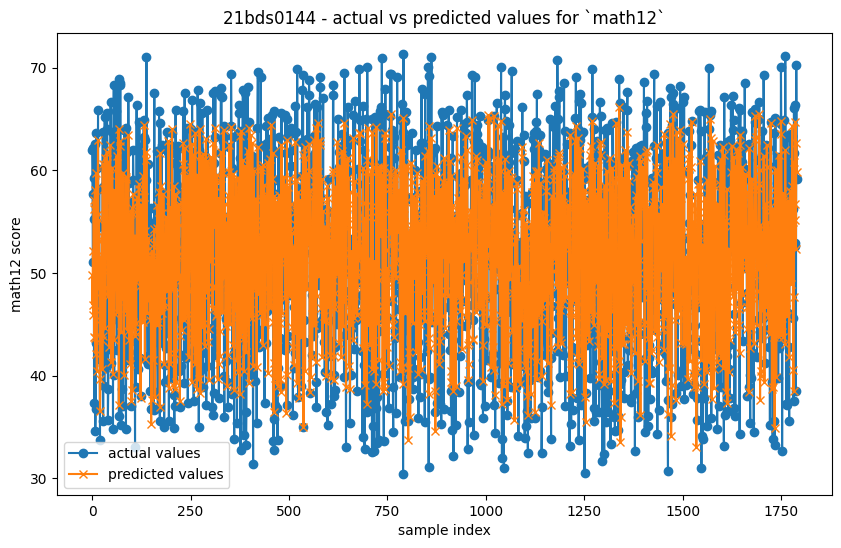

In [61]:
comparison_df = pd.DataFrame({
    'actual values': y_test.values,
    'predicted values': y_pred,
    'difference': y_test.values - y_pred
})
print(comparison_df.head())

plt.figure(figsize = (10, 6))
plt.plot(y_test.values, label = 'actual values', marker = 'o')
plt.plot(y_pred, label = 'predicted values', marker = 'x')
plt.title('21bds0144 - actual vs predicted values for `math12`')
plt.xlabel('sample index')
plt.ylabel('math12 score')
plt.legend()
plt.show()

##### 3. Calculating metrics

In [62]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("r-squared (r2):", r2)
print("mean absolute error (MAE):", mae)
print("mean squared error (MSE):", mse)

r-squared (r2): 0.547864543327907
mean absolute error (MAE): 5.211466118403163
mean squared error (MSE): 41.600983355205976


- R² tells how well the model captures overall variance. <br>Here, R2 = 0.5479, which indicates that about 54.79% of the variance in math12 scores is explained by the model. This is considered moderate predictive power. <br><br>
- MAE provides a clear average prediction error. <br>In this case, MAE = 5.2115, meaning, on average, the model's predictions are off by about 5.21 points from the actual math12 scores. <br><br>
- MSE highlights larger errors, helpful in spotting significant prediction discrepancies. <br>Here MSE = 41.601, which shows the average squared error. It’s more challenging to interpret directly due to squaring, but generally, a lower MSE suggests a better model fit.